# Projeto 1 - Estatística

# Preço vs. Falência

### Integrantes

| Nome   |      No. USP      |
|----------|:-------------:|
| Téo Sobrino Alves |  12557192 |
| Jorge Augusto Salgado Salhani |    8927418   |
| Marcus Vinicius Santos Rodrigues | 11218862 |
| Victor Hugo Oliveira da Silva | 11320901 |        


### Problema - Visão geral

- Você é um vendedor de peixes grelhados. 

- Você é responsável por pescar, cozinhar e vender o peixe. (Armazenando apenas um único peixe)

- A cada hora, um cliente pode aparecer na sua loja, e isso determina sua próxima ação

Valores:

- A cada venda: $+S$ reais

- A cada hora: $-T$ reais (aluguel)

- Lucro ($L$): $L = S - T$ por hora

## Modelagem por Cadeias de Markov



### Códigos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from pydoc import describe

In [ ]:
def proxima_acao(curr_state, cap, clientes_p, h_desc, contador_transic, q, p, custo_peixe, preco_barraca):
    probtrans = np.array([[0, p, 0, (1-p)], 
                    [q, (1-q), 0, 0],
                    [p, 0, (1-p), 0], 
                    [p*q, p*(1-q), q*(1-p), (1-p)*(1-q)]])
    vetprob = probtrans[curr_state]
    next_state = np.random.choice(4, p = vetprob)
    contador_transic[curr_state, next_state] += 1
    cap -= preco_barraca
    if(next_state == 2):
        h_desc = 0
    else:
        h_desc += 1
        if(next_state == 0):
            cap += custo_peixe
    if next_state == 0 and np.random.random() <= p and curr_state == 1:
        clientes_p += 1
    elif curr_state == 1 and next_state == 1 and np.random.random() <= p:
        clientes_p += 1
    return next_state, cap, clientes_p, h_desc, contador_transic

In [ ]:
def simular_N_horas_M_barracas(N_horas, M_barracas):
  colunas = []
  colunas.append("estado")
  colunas.append("ClientesAtendidos")
  colunas.append("ClientesPerdidos")
  colunas.append("CapitalAtual")
  colunas.append("TempoDescansos")

  for i in range(0, 4):
      for j in range(0, 4):
          coluna = str(i) + " -> " + str(j)
          colunas.append(coluna)

  n_barracas = M_barracas
  n_horas = N_horas
  dados = np.zeros((n_barracas*n_horas, 21))
  df = pd.DataFrame(dados, columns=colunas)
  
  curr_state = 3
  cap = 0
  cap_ini = 0
  clientes_p = 0
  h_desc = 0
  cont_trans = np.zeros((4,4))
  q = 0.7
  p = 0.4
  custo_peixe = 32
  preco_barraca = 10
  
  list = [3]
  for l in range(20):
      list.append(0)


  for k in range(n_horas*n_barracas):
      if(k%900 == 0):
          curr_state = 3
          cap = clientes_p = h_desc = 0
          cont_trans = np.zeros((4,4))
      curr_state, cap, clientes_p, h_desc, cont_trans = proxima_acao(curr_state, cap, clientes_p, h_desc, cont_trans, q, p, custo_peixe, preco_barraca)
      c_at = sum(cont_trans[0])
      newline = [curr_state, c_at, clientes_p, cap, h_desc]
      for i in range(0, 4):
          for j in range(0, 4):
              newline.append(cont_trans[i][j])
      df.loc[k+1] = newline
      
      # modo preguiçoso:
      # if(cap > cap_ini):
      #     q = 0.8*q
      # elif(cap < cap_ini and q < 0.7):
      #     q = q/0.8
  # print(np.sum(cont_trans/(n_horas), axis = -1))
  # df
  return df


### Descrição

Sejam $C$ e $P$ variáveis aleatórias onde 

- $C$: Presença de cliente na loja
- $P$: Existe um peixe disponível

Existem 4 estados possíveis:


| Índice | Estado atual ($C, P$)   |     Descrição      |
|------|:------------:|-------------|
|0| $C \cap P$ | Cozinhar e vender |
|1| $C \cap \sim P$ | Pescar |
|2| $\sim C \cap P$ | Descansar |
|3| $\sim C \cap \sim P$ | Pescar |


Matriz de probabilidade de transição $P$:

$$
P =
\left [
  \begin{array}{ccc}
  0 & p & 0 & (1-p) \\
  q & (1-q) & 0 & 0 \\
  p & 0 & (1-p) & 0 \\
  pq & p(1-q) & q(1-p) & (1-q)(1-p) \\
  \end{array}
\right ]
\begin{array}{c}
0 \\
1 \\
2 \\
3
\end{array}
$$


Sendo 

- Primeira linha: estado 0
- Segunda linha: estado 1
- $...$

E também

- $p$: probabilidade de chegar um cliente
- $q$: probabilidade de pescar um peixe

In [ ]:
df = simular_N_horas_M_barracas(5, 1)
df

,estado,ClientesAtendidos,ClientesPerdidos,CapitalAtual,TempoDescansos,0 -> 0,0 -> 1,0 -> 2,0 -> 3,1 -> 0,...,1 -> 2,1 -> 3,2 -> 0,2 -> 1,2 -> 2,2 -> 3,3 -> 0,3 -> 1,3 -> 2,3 -> 3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,1.0,0.0,12.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,-8.0,4.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0.0,1.0,1.0,14.0,5.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
n_horas = 100000
df = simular_N_horas_M_barracas(n_horas, 1)
print(len(df[df['estado'] == 0])/n_horas)
print(len(df[df['estado'] == 1])/n_horas)
print(len(df[df['estado'] == 2])/n_horas)
print(len(df[df['estado'] == 3])/n_horas)

0.31209
0.21776
0.24106
0.2291


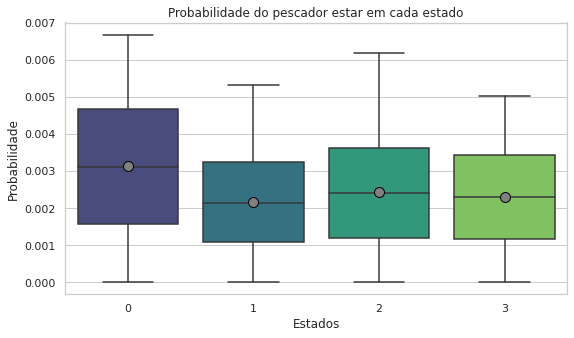

In [ ]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.boxplot(data = ((df["0 -> 0"] + df["1 -> 0"] + df["2 -> 0"] + df["3 -> 0"])/45000, 
(df["0 -> 1"] + df["1 -> 1"] + df["2 -> 1"] + df["3 -> 1"])/45000, 
(df["0 -> 2"] + df["1 -> 2"] + df["2 -> 2"] + df["3 -> 2"])/45000, 
(df["0 -> 3"] + df["1 -> 3"] + df["2 -> 3"] + df["3 -> 3"])/45000), 
showmeans=True, meanprops={"marker": "o", "markerfacecolor": "grey", 
"markeredgecolor": "black", "markersize": "10"},
palette= "viridis").set(title='Probabilidade do pescador estar em cada estado')
#palette='viridis' ou 'cubehelix' ou 'rocket' se pá
plt.xlabel('Estados')
plt.ylabel('Probabilidade')
plt.show()

## Estudo de Convergência: Exponenciação matricial

### Código

In [ ]:
def exponenciar_matrix(matriz_transicao_T, N):
  if N == 0 or N == 1: return matriz_transicao_T
  result = np.matmul(matriz_transicao_T, matriz_transicao_T)
  return exponenciar_matrix(result, N-1)

In [ ]:
p = 0.4
q = 0.7

T = [
  [0,     p,        0,        (1-p)       ], 
  [q,     (1-q),    0,        0           ],
  [p,     0,        (1-p),    0           ], 
  [(p*q), p*(1-q),  q*(1-p),  (1-p)*(1-q) ]
]
m = exponenciar_matrix(T, 50)
print(m)

[[0.31351303 0.21847598 0.24086977 0.22939978]
 [0.31351303 0.21847598 0.24086977 0.22939978]
 [0.31351303 0.21847598 0.24086977 0.22939978]
 [0.31351303 0.21847598 0.24086977 0.22939978]]


### Descrição

Dada uma matriz de probabilidade de transição $P$
- $P^2$: probabilidade de transitar $i \to j$ em $n = 2$ passos
- $P^3$: probabilidade de transitar $i \to j$ em $n = 3$ passos
- $...$

Se $n = N$ grande, encontramos a probabilidade de estar no estado $j$ no regime estacionário

- $P(e=0) \approx 0.3135$
- $P(e=1) \approx 0.2185$
- $P(e=2) \approx 0.2409$
- $P(e=3) \approx 0.2294$

Que confere com os resultados experimentais

## Resultados

In [ ]:
def simular_N_horas_M_barracas_var_PQ_preguicoso(N_horas, M_barracas, p, q, custo_peixe, capital_inicial):
  colunas = []
  colunas.append("estado")
  colunas.append("ClientesAtendidos")
  colunas.append("ClientesPerdidos")
  colunas.append("CapitalAtual")
  colunas.append("TempoDescansos")

  for i in range(0, 4):
      for j in range(0, 4):
          coluna = str(i) + " -> " + str(j)
          colunas.append(coluna)

  n_barracas = M_barracas
  n_horas = N_horas
  dados = np.zeros((n_barracas*n_horas, 21))
  df = pd.DataFrame(dados, columns=colunas)
  
  curr_state = 3
  cap = capital_inicial
  cap_ini = 0
  clientes_p = 0
  h_desc = 0
  cont_trans = np.zeros((4,4))
  custo_peixe = custo_peixe
  preco_barraca = 10
  
  for k in range(n_horas*n_barracas):
      # if(k%900 == 0):
      #     curr_state = 3
      #     cap = clientes_p = h_desc = 0
      #     cont_trans = np.zeros((4,4))
      curr_state, cap, clientes_p, h_desc, cont_trans = proxima_acao(curr_state, cap, clientes_p, h_desc, cont_trans, q, p, custo_peixe, preco_barraca)
      c_at = sum(cont_trans[0])
      newline = [curr_state, c_at, clientes_p, cap, h_desc]
      for i in range(0, 4):
          for j in range(0, 4):
              newline.append(cont_trans[i][j])
      df.loc[k] = newline
      
      # modo preguiçoso:
      if(cap > cap_ini):
          q = 0.8*q
      elif(cap < cap_ini and q < 0.7):
          q = q/0.8
  # print(np.sum(cont_trans/(n_horas), axis = -1))
  # df
  return df

In [ ]:
def simular_N_horas_M_barracas_var_PQ(N_horas, M_barracas, p, q, custo_peixe, capital_inicial):
  colunas = []
  colunas.append("estado")
  colunas.append("ClientesAtendidos")
  colunas.append("ClientesPerdidos")
  colunas.append("CapitalAtual")
  colunas.append("TempoDescansos")

  for i in range(0, 4):
      for j in range(0, 4):
          coluna = str(i) + " -> " + str(j)
          colunas.append(coluna)

  n_barracas = M_barracas
  n_horas = N_horas
  dados = np.zeros((n_barracas*n_horas, 21))
  df = pd.DataFrame(dados, columns=colunas)
  
  curr_state = 3
  cap = capital_inicial
  cap_ini = 0
  clientes_p = 0
  h_desc = 0
  cont_trans = np.zeros((4,4))
  custo_peixe = custo_peixe
  preco_barraca = 10
  
  for k in range(n_horas*n_barracas):
      # if(k%900 == 0):
      #     curr_state = 3
      #     cap = clientes_p = h_desc = 0
      #     cont_trans = np.zeros((4,4))
      curr_state, cap, clientes_p, h_desc, cont_trans = proxima_acao(curr_state, cap, clientes_p, h_desc, cont_trans, q, p, custo_peixe, preco_barraca)
      c_at = sum(cont_trans[0])
      newline = [curr_state, c_at, clientes_p, cap, h_desc]
      for i in range(0, 4):
          for j in range(0, 4):
              newline.append(cont_trans[i][j])
      df.loc[k] = newline
      
      # modo preguiçoso:
      # if(cap > cap_ini):
      #     q = 0.8*q
      # elif(cap < cap_ini and q < 0.7):
      #     q = q/0.8
  # print(np.sum(cont_trans/(n_horas), axis = -1))
  # df
  return df

## Questão 1: 

- Um pescador com maior capital inicial poderia vender mais barato e levar a falência a outro com menor capital?

### Vamos supor que

- Uma vendedora concorrente possui capital inicial maior

- Você: capital inicial: $C(t=0) = $R$ 500.00 

- Concorrente: capital inicial: $C(t=0) = $R$ 1000.00 

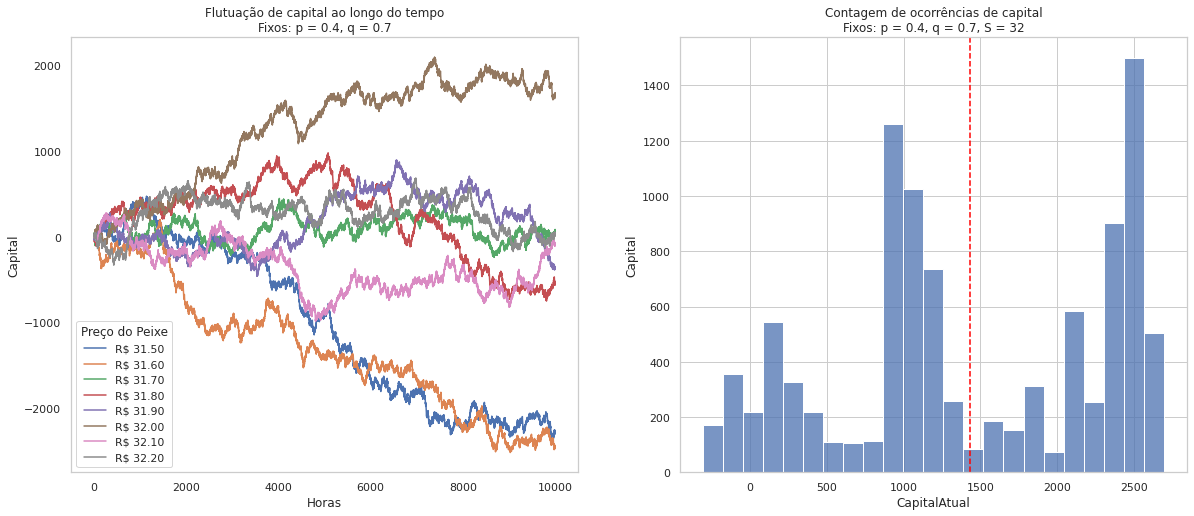

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
n_horas = 10000
dt = 0.1
custo_peixe = 31.5

for i in range(8):
  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=custo_peixe, capital_inicial=0)
  ax[0].plot([i for i in range(len(df))], df['CapitalAtual'], label='R\$ {:.2f}'.format(custo_peixe))
  custo_peixe += dt

ax[0].set_ylabel('Capital')
ax[0].set_xlabel('Horas')
ax[0].set_title('Flutuação de capital ao longo do tempo\nFixos: p = 0.4, q = 0.7')

ax[0].grid()
ax[0].legend()

df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=32, capital_inicial=0)
sns.histplot(df, x='CapitalAtual', ax=ax[1], label='R\$ 32.00')
ax[1].axvline(np.mean(df['CapitalAtual']), color='red' , ls='dashed')

ax[0].legend(title='Preço do Peixe')

ax[1].set_title('Contagem de ocorrências de capital\nFixos: p = 0.4, q = 0.7, S = 32')
ax[1].set_ylabel('Número de ocorrências')
ax[1].set_ylabel('Capital')

plt.show()

O preço do peixe a aproximadamente R$ 32.00 mantém a estabilidade entre o lucro extremo (tendência crescente) e falência (tendência de queda).

Como a tendência representa o valor em médio-longo prazo

- Custo reduzido da concorrente é possível por tempo limitado. Caso contrário, a concorrente declara falência

In [ ]:
n_horas = 1000
colun = ['capital_minimo']
capital_minimo_CI500 = []
capital_minimo_CI1000 = []
for i in range(1000):
  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=32, capital_inicial=500)
  capital_minimo_CI500.append(np.min(df['CapitalAtual']))
  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=32, capital_inicial=1000)
  capital_minimo_CI1000.append(np.min(df['CapitalAtual']))

In [ ]:
df_min500 = pd.DataFrame(capital_minimo_CI500, columns=colun)
df_min1000 = pd.DataFrame(capital_minimo_CI1000, columns=colun)

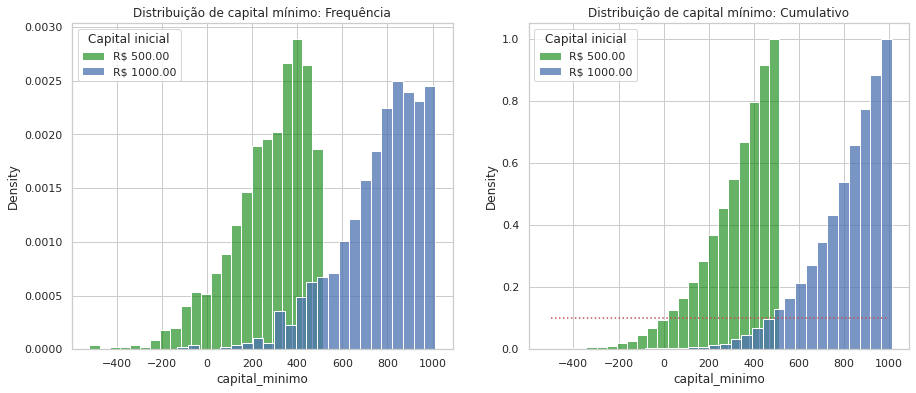

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.histplot(df_min500, x='capital_minimo', stat='density', ax=ax[0], color='green', alpha=.6)
sns.histplot(df_min1000, x='capital_minimo', stat='density', ax=ax[0])
sns.histplot(df_min500, x='capital_minimo', stat='density', cumulative=True, ax=ax[1], color='green', alpha=.6)
sns.histplot(df_min1000, x='capital_minimo', stat='density', cumulative=True, ax=ax[1])
ax[0].set_title('Distribuição de capital mínimo: Frequência')
ax[1].set_title('Distribuição de capital mínimo: Cumulativo')
ax[0].legend(['R\$ 500.00', 'R\$ 1000.00'], title='Capital inicial')
ax[1].legend(['R\$ 500.00', 'R\$ 1000.00'], title='Capital inicial')
ax[1].hlines(0.1, -500, 1000, 'r', ls='dotted')
plt.show()

Na presença de uma concorrente com maior capital inicial, como apenas para $\sim 1\%$ dos casos a concorrência leva você à falência e pode, a longo prazo, levá-la a falência, em geral não é uma estratégia muito vantajosa para a concorrente.

## Questão 2: 

- Qual é o capital final esperado após 900h, condicionado a não ter falido?

Como a falência ocorre para uma barraca sempre que $min[C(t)] < 0$

- O resultado esperado é análogo ao obtido na questão anterior, truncado em $c(t) = 0$.

- Por conta disso, a não falência depende diretamente do capital inicial $C_0 = C(t=0)$

Seja, por exemplo, $n$: no. horas, $T$: valor do aluguel da barraca

- A invariância por deslocamento em $y$ do resultado faz com que, caso não haja falência por conta do alto orçamento inicial ($C_0 \geq  nT$), o valor $C(t)$ mantém-se estável se $S \approx R\$ 32.00$, com $C(t) \approx C_0$

No entanto, vamos selecionar apenas barracas prósperas com $C_0 = R\$ 500.00$ e $C_0 = R\$ 1000.00$

In [ ]:
n_horas = 1000
colun = ['capital']
capital_1 = []
capital_2 = []

for i in range(1000):
  df1 = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=32, capital_inicial=500)
  df2 = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=32, capital_inicial=1000)
  if np.min(df1['CapitalAtual']) < 0 or np.min(df2['CapitalAtual']) < 0:
    i-=1
  else:
    capital_1.append(np.mean(df1['CapitalAtual']))
    capital_2.append(np.mean(df2['CapitalAtual']))

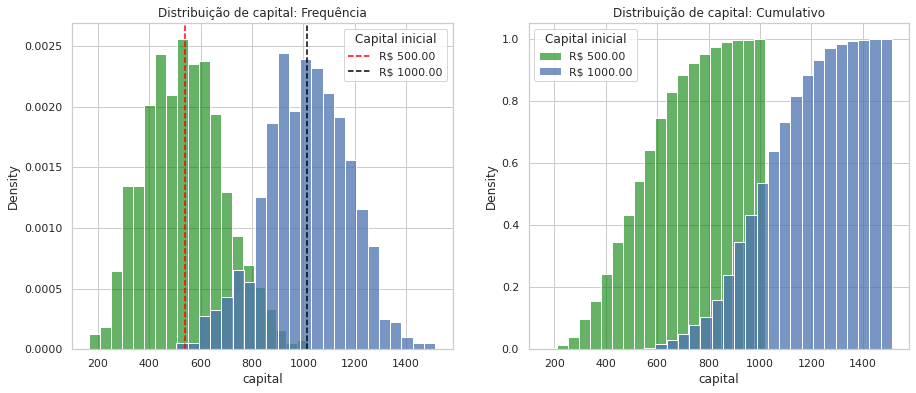

In [ ]:
df_cap1 = pd.DataFrame(capital_1, columns=colun)
df_cap2 = pd.DataFrame(capital_2, columns=colun)

fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.histplot(df_cap1, x='capital', stat='density', ax=ax[0], color='green', alpha=.6)
sns.histplot(df_cap2, x='capital', stat='density', ax=ax[0])
sns.histplot(df_cap1, x='capital', stat='density', cumulative=True, ax=ax[1], color='green', alpha=.6)
sns.histplot(df_cap2, x='capital', stat='density', cumulative=True, ax=ax[1])

ax[0].axvline(np.mean(df_cap1['capital']), color='red' , ls='dashed')
ax[0].axvline(np.mean(df_cap2['capital']), color='black' , ls='dashed')

ax[0].set_title('Distribuição de capital: Frequência')
ax[1].set_title('Distribuição de capital: Cumulativo')
ax[0].legend(['R\$ 500.00', 'R\$ 1000.00'], title='Capital inicial')
ax[1].legend(['R\$ 500.00', 'R\$ 1000.00'], title='Capital inicial')
plt.show()

Conforme esperado, se condicionado à não falência e mantendo $S = 32$ (valor que estabiliza o capital para evitar o lucro ou falência extremos)

- Ambas distribuições convergem para $E[C(t)] = C_0$

## Questão 3:

- Existem pedidos não atendidos?

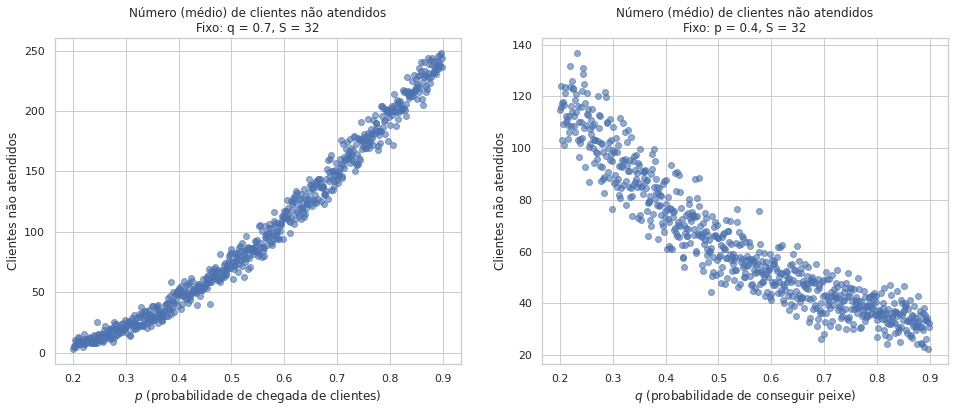

In [ ]:
n_horas = 1000
fig, ax = plt.subplots(1,2,figsize=(16,6))

for p in np.arange(0.2, 0.9, 0.001):
  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=p, q=0.7, custo_peixe=32, capital_inicial=500)
  ax[0].plot(p, np.mean(df['ClientesPerdidos']), 'bo', alpha=.6)

  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=p, custo_peixe=32, capital_inicial=500)
  ax[1].plot(p, np.mean(df['ClientesPerdidos']), 'bo', alpha=.6)

ax[0].set_title('Número (médio) de clientes não atendidos\nFixo: q = 0.7, S = 32')
ax[0].set_ylabel('Clientes não atendidos')
ax[0].set_xlabel(r'$p$ (probabilidade de chegada de clientes)')

ax[1].set_title('Número (médio) de clientes não atendidos\nFixo: p = 0.4, S = 32')
ax[1].set_ylabel('Clientes não atendidos')
ax[1].set_xlabel(r'$q$ (probabilidade de conseguir peixe)')

plt.show()

Existem pedidos não atendidos

Correlação com $p$ (positiva):

- Quanto maior a probabilidade de chegada de clientes, maior o número de clientes e, consequentemente maior o número de não atendimentos

Correlação com $q$ (negativa):

- Quanto maior a probabilidade de pesca bem sucedida, maior a chance de existir um peixe em estoque ou de pescar um peixe quando um novo cliente aparece. Portanto, menor o número de clientes não atendidos

## Questão 4: 

- Caso $C(t) > C(t=0)$, (capital atual maior que o capital inicial), o pescador fica preguiçoso e sua probabilidade de pesca reduz em $0.8q$. Qual o valor apropriado de $S$?

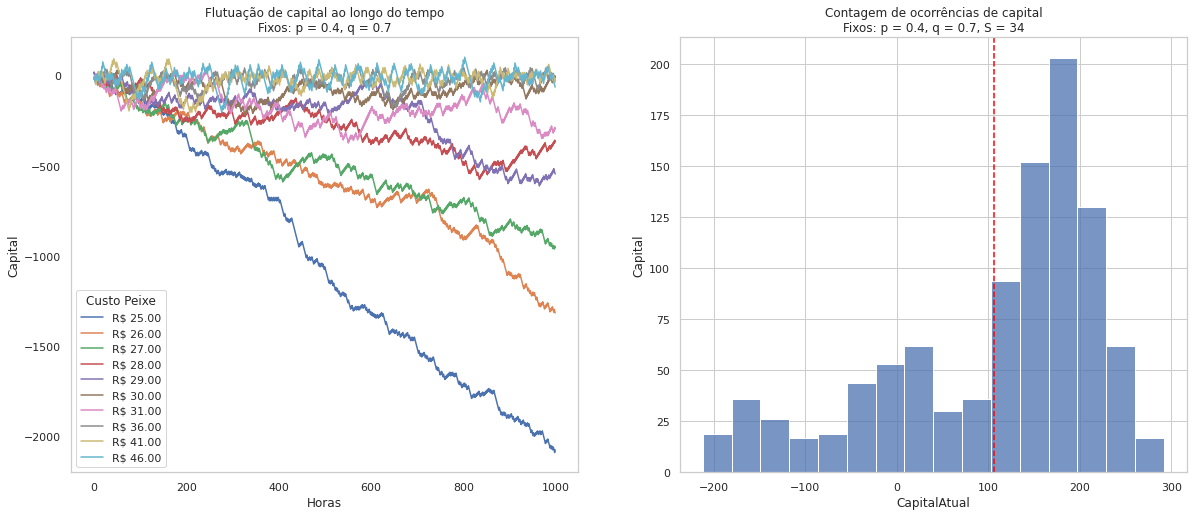

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
n_horas = 1000
dt = 1
custo_peixe = 25

for i in range(10):
  if custo_peixe > 30: dt = 5
  df = simular_N_horas_M_barracas_var_PQ_preguicoso(n_horas, 1, p=0.4, q=0.7, custo_peixe=custo_peixe, capital_inicial=0)
  ax[0].plot([i for i in range(len(df))], df['CapitalAtual'], label='R\$ {:.2f}'.format(custo_peixe))
  custo_peixe += dt

ax[0].set_ylabel('Capital')
ax[0].set_xlabel('Horas')
ax[0].set_title('Flutuação de capital ao longo do tempo\nFixos: p = 0.4, q = 0.7')

ax[0].grid()
ax[0].legend()

df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=0.7, custo_peixe=34, capital_inicial=0)
sns.histplot(df, x='CapitalAtual', ax=ax[1], label='R\$ 32.00')
ax[1].axvline(np.mean(df['CapitalAtual']), color='red' , ls='dashed')

ax[0].legend(title='Custo Peixe')

ax[1].set_title('Contagem de ocorrências de capital\nFixos: p = 0.4, q = 0.7, S = 34')
ax[1].set_ylabel('Número de ocorrências')
ax[1].set_ylabel('Capital')

plt.show()

Modo preguiçoso: pior pesca ($q = 0.8 q$) caso o capital atual $C(t) > C(t=0)$

- A redução do número de peixe obtido faz com que quando $C(t) > C(t=0)$, exista pouca venda e, portanto, pouca renda

- O que vemos é um limitante do capital, onde para $S > 32$ (que originalmente estabiliza a o lucro no patamar do capital inicial) não há vantagens em termos de renda.

## Questão 5:

- Quantas horas ele terá que trabalhar entre dois descansos?

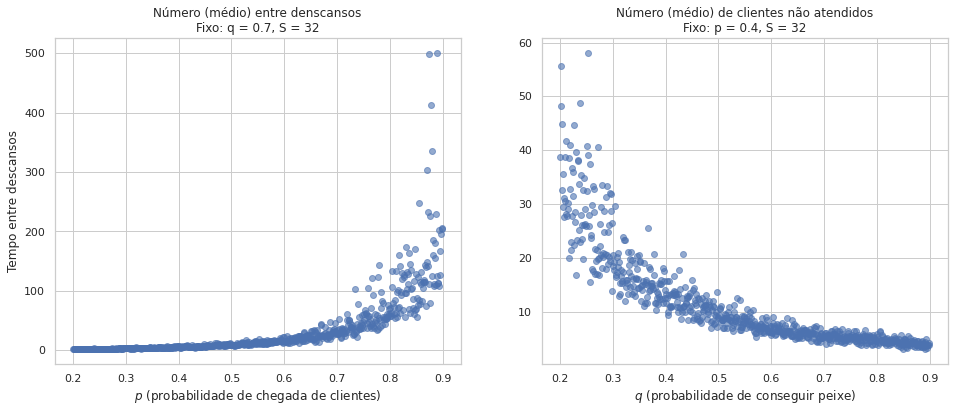

In [ ]:
n_horas = 1000
fig, ax = plt.subplots(1,2,figsize=(16,6))

for p in np.arange(0.2, 0.9, 0.001):
  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=p, q=0.7, custo_peixe=32, capital_inicial=500)
  ax[0].plot(p, np.mean(df['TempoDescansos']), 'bo', alpha=.6)

  df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=0.4, q=p, custo_peixe=32, capital_inicial=500)
  ax[1].plot(p, np.mean(df['TempoDescansos']), 'bo', alpha=.6)

ax[0].set_title('Número (médio) entre denscansos\nFixo: q = 0.7, S = 32')
ax[0].set_ylabel('Tempo entre descansos')
ax[0].set_xlabel(r'$p$ (probabilidade de chegada de clientes)')

ax[1].set_title('Número (médio) de clientes não atendidos\nFixo: p = 0.4, S = 32')
ax[0].set_ylabel('Tempo entre descansos')
ax[1].set_xlabel(r'$q$ (probabilidade de conseguir peixe)')

plt.show()

Tempo entre descansos segue uma distribuição tipicamente exponencial

Correlação com $p$ (positiva):

- Se $p$ pequeno, menos clientes aparecem e o intervalo entre descansos é pequeno. Ou seja, o pescador passa mais tempo descansando

- Se $p$ grande, ocorre o contrário. Mais clientes aparecem e maior o tempo entre descansos (menor o tempo descansando)

Correlação com $q$ (negativa):

- Se $q$ pequeno, menor a chance de conseguir peixe, e portanto maior a chance de precisar continuar pescando. Portanto, maior o tempo entre descansos (menos tempo descansando)

- Se $q$ grande, ocorre o contrário. A pesca é mais eficiente, permitindo maior tempo descansando e, portanto, menor tempo entre os descansos.

## Extras

#### Códigos

In [ ]:
colunas = ['p', 'q', 'custo_peixe', 'capital_medio', 'capital_minimo', 'horas_descanso_medio']
dados = []
for p in np.arange(0.2, 0.8, 0.05):
  for q in np.arange(0.2, 0.8, 0.05):
    for custo_peixe in np.arange(25, 38, 2):
      n_horas = 5000
      df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=p, q=q, custo_peixe=custo_peixe, capital_inicial=500)
      dados.append([p, q, custo_peixe, np.mean(df['CapitalAtual']), np.min(df['CapitalAtual']), np.mean(df['TempoDescansos'])])

df_esp_fase = pd.DataFrame(dados, columns=colunas)

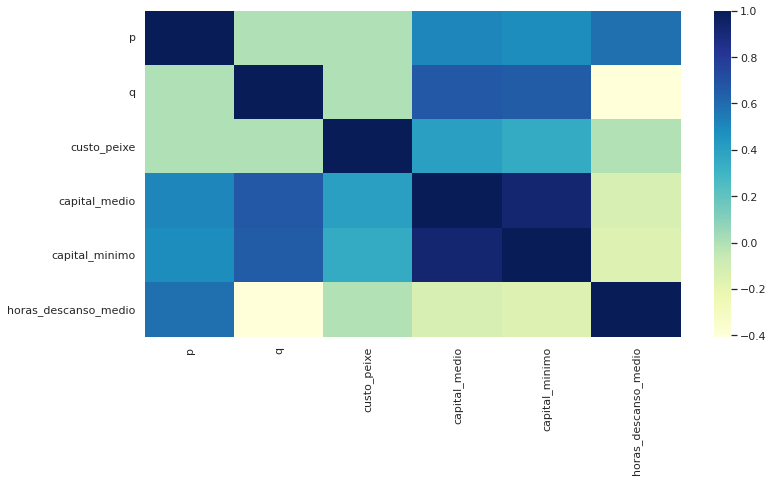

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data = df_esp_fase.corr(), cmap="YlGnBu",
            xticklabels=colunas,
            yticklabels=colunas)

Resultados em destaque: Correlação 

- horas_descanso (horas entre descansos) e $p$: altamente positiva: Quanto mais cliente chega, maior o tempo pescando e cozinhando, e menor o tempo entre descansos

- horas_descanso (horas entre descansos) e $q$: levemente negativa: Quanto melhor a habilidade de pesca, menor o tempo de pesca, e portanto maior o tempo entre descansos

In [ ]:
falencia = np.array(df_esp_fase['capital_minimo'] < 0)
falencia = ['Falencia' if i == True else 'Prospero' for i in falencia]
df_esp_fase['Falencia'] = falencia
df_esp_fase.tail()


,p,q,custo_peixe,capital_medio,capital_minimo,horas_descanso_medio,Falencia
1178,0.8,0.8,29,7360.3682,489.0,72.0090,Prospero
1179,0.8,0.8,31,9384.5224,511.0,57.2596,Prospero
1180,0.8,0.8,33,10953.9488,483.0,48.9688,Prospero
1181,0.8,0.8,35,13577.1000,515.0,62.6030,Prospero
1182,0.8,0.8,37,16045.6384,517.0,63.2884,Prospero


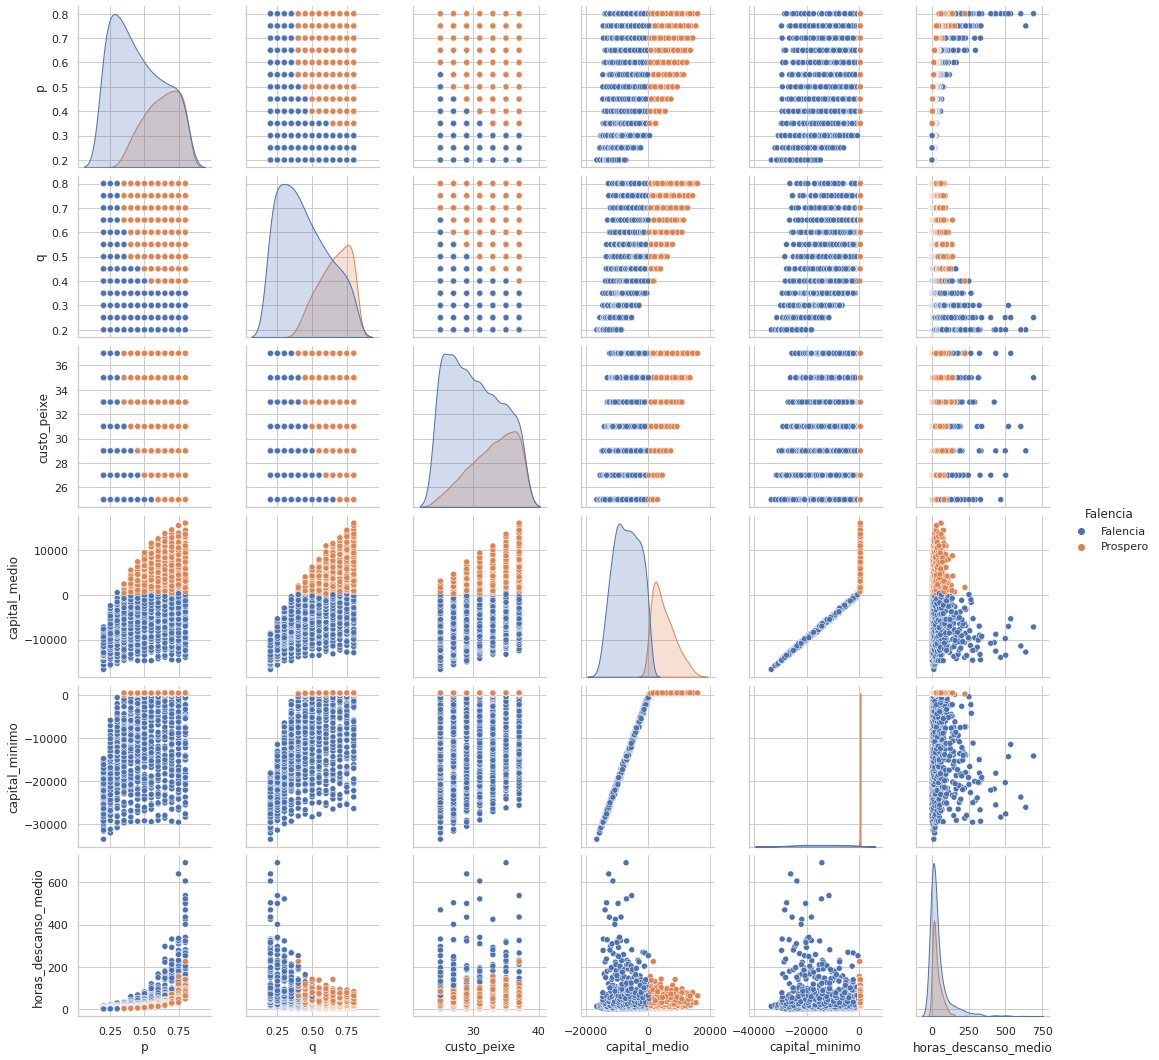

In [ ]:
sns.pairplot(df_esp_fase, hue='Falencia')
plt.show()

Resultados em destaque:

- Espaço de estados: $p$ vs. $q$: Existe uma região para a qual temos falência, e uma região que leva à prosperidade do negócio.

- horas entre descansos: Distribuição exponencial

### Considerando:
- Capital inicial: R$ 0

- Falência: Caso $E[L(t)] < 0$ (valor esperado)

In [ ]:
colunas = ['p', 'q', 'custo_peixe', 'capital_medio', 'capital_minimo', 'horas_descanso_medio']
dados = []
for p in np.arange(0.2, 0.8, 0.05):
  print(p)
  for q in np.arange(0.2, 0.8, 0.05):
    for custo_peixe in np.arange(25, 38, 2):
      n_horas = 5000
      df = simular_N_horas_M_barracas_var_PQ(n_horas, 1, p=p, q=q, custo_peixe=custo_peixe, capital_inicial=0)
      dados.append([p, q, custo_peixe, np.mean(df['CapitalAtual']), np.min(df['CapitalAtual']), np.mean(df['TempoDescansos'])])

df_esp_fase = pd.DataFrame(dados, columns=colunas)

0.2
0.25
0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.5999999999999999
0.6499999999999999
0.7
0.7499999999999998
0.7999999999999998


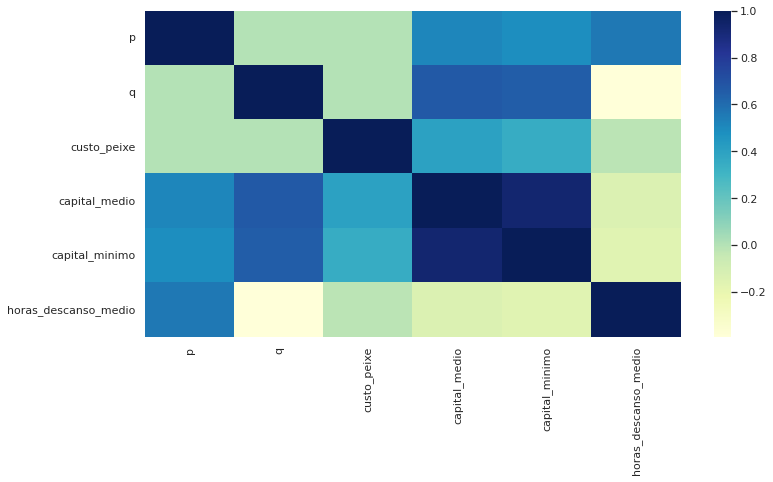

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data = df_esp_fase.corr(), cmap="YlGnBu",
            xticklabels=colunas,
            yticklabels=colunas)
plt.show()

In [ ]:

falencia = np.array(df_esp_fase['capital_medio'] < 0)
falencia = ['Falencia' if i == True else 'Prospero' for i in falencia]
df_esp_fase['Falencia'] = falencia
df_esp_fase.head()


,p,q,custo_peixe,capital_medio,capital_minimo,horas_descanso_medio,Falencia
0,0.2,0.2,25,-16684.6400,-33100.0,14.3130,Falencia
1,0.2,0.2,27,-16109.6502,-31883.0,15.3222,Falencia
2,0.2,0.2,29,-15531.2684,-31063.0,12.5896,Falencia
3,0.2,0.2,31,-15339.0636,-30284.0,15.8452,Falencia
4,0.2,0.2,33,-14782.2600,-29507.0,13.1666,Falencia


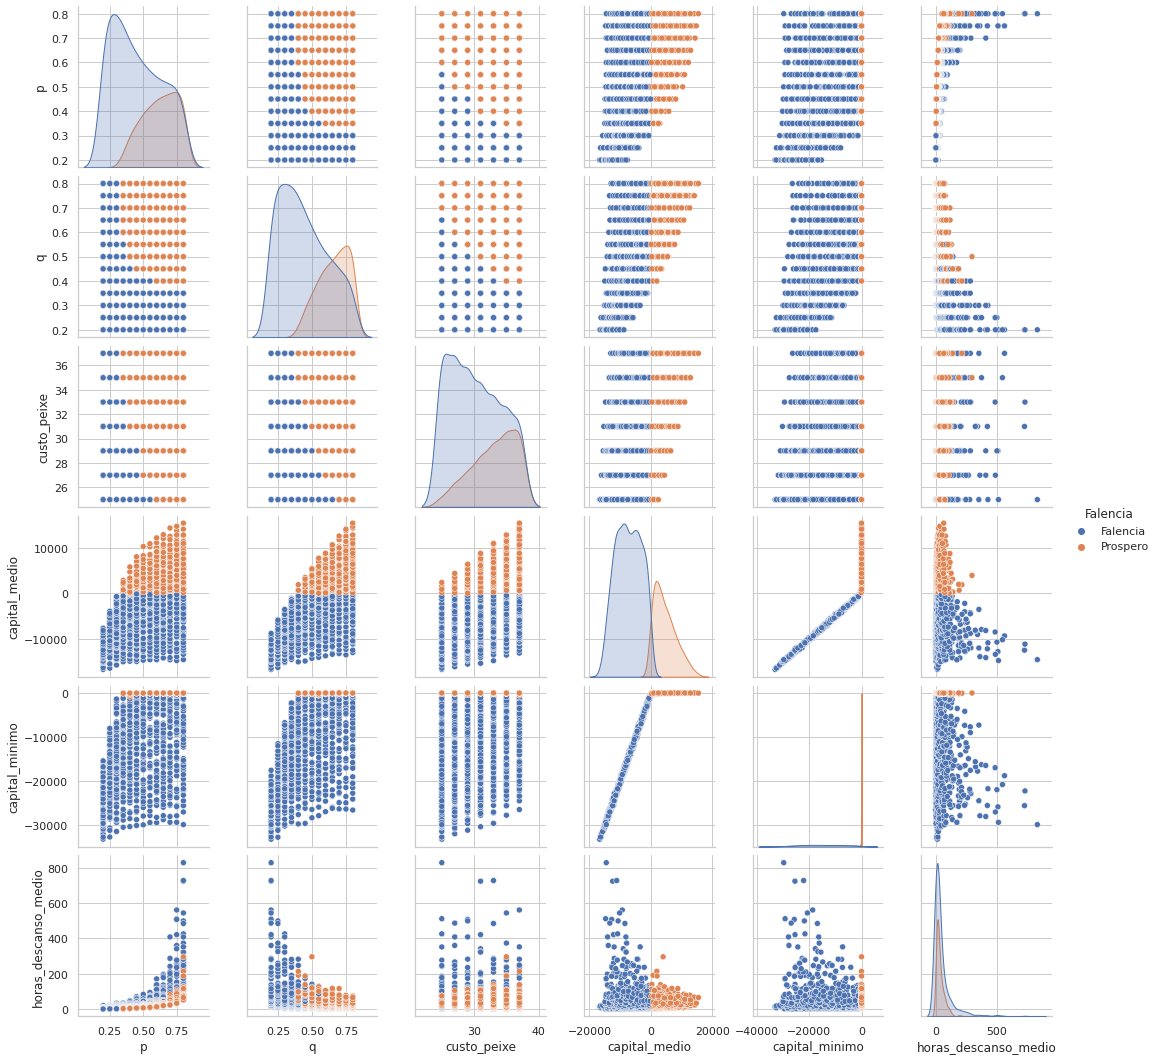

In [ ]:
sns.pairplot(df_esp_fase, hue='Falencia')
plt.show()


## Resultados anteriores

In [ ]:
def simular_N_horas_M_barracas(N_horas, M_barracas):
  colunas = []
  colunas.append("estado")
  colunas.append("ClientesAtendidos")
  colunas.append("ClientesPerdidos")
  colunas.append("CapitalAtual")
  colunas.append("TempoDescansos")

  for i in range(0, 4):
      for j in range(0, 4):
          coluna = str(i) + " -> " + str(j)
          colunas.append(coluna)

  n_barracas = M_barracas
  n_horas = N_horas
  dados = np.zeros((n_barracas*n_horas, 21))
  df = pd.DataFrame(dados, columns=colunas)
  
  curr_state = 3
  cap = 0
  cap_ini = 0
  clientes_p = 0
  h_desc = 0
  cont_trans = np.zeros((4,4))
  q = 0.7
  p = 0.4
  custo_peixe = 32
  preco_barraca = 10
  
  list = [3]
  for l in range(20):
      list.append(0)


  for k in range(n_horas*n_barracas):
      if(k%900 == 0):
          curr_state = 3
          cap = clientes_p = h_desc = 0
          cont_trans = np.zeros((4,4))
      curr_state, cap, clientes_p, h_desc, cont_trans = proxima_acao(curr_state, cap, clientes_p, h_desc, cont_trans, q, p, custo_peixe, preco_barraca)
      c_at = sum(cont_trans[0])
      newline = [curr_state, c_at, clientes_p, cap, h_desc]
      for i in range(0, 4):
          for j in range(0, 4):
              newline.append(cont_trans[i][j])
      df.loc[k+1] = newline
      
      # modo preguiçoso:
      # if(cap > cap_ini):
      #     q = 0.8*q
      # elif(cap < cap_ini and q < 0.7):
      #     q = q/0.8
  # print(np.sum(cont_trans/(n_horas), axis = -1))
  # df
  return df

In [ ]:
n_horas = 9000
n_barracas = 200
df = simular_N_horas_M_barracas(n_horas, n_barracas)

In [ ]:
curr_state = 3
cap = 0
cap_ini = 0
clientes_p = 0
h_desc = 0
cont_trans = np.zeros((4,4))
q = 0.7
list = [3]
for l in range(20):
    list.append(0)


for k in range(n_horas*n_barracas):
    if(k%900 == 0):
        curr_state = 3
        cap = clientes_p = h_desc = 0
        cont_trans = np.zeros((4,4))
    curr_state, cap, clientes_p, h_desc, cont_trans = proxima_acao(curr_state, cap, clientes_p, h_desc, cont_trans, q)
    c_at = sum(cont_trans[0])
    newline = [curr_state, c_at, clientes_p, cap, h_desc]
    for i in range(0, 4):
        for j in range(0, 4):
            newline.append(cont_trans[i][j])
    df.loc[k+1] = newline
    
    # modo preguiçoso:
    # if(cap > cap_ini):
    #     q = 0.8*q
    # elif(cap < cap_ini and q < 0.7):
    #     q = q/0.8
# print(np.sum(cont_trans/(n_horas), axis = -1))
# df


TypeError: ignored

In [ ]:
#guradar num csv
#df.to_csv('df32.csv')

In [ ]:
#abrir de um csv
#df2 = pd.read_csv('df32.csv')
df2 = df

In [ ]:
min_cap = np.zeros((1, n_barracas))

for i in range(1, n_barracas):
    min_cap[0][i-1] += df2['CapitalAtual'][((i-1)*n_horas) : (i*n_horas)].min() 
datamin = pd.DataFrame(min_cap)  
datamin.iloc[0].describe(datetime_is_numeric=True)
min_cap

In [ ]:

sns.set(style="darkgrid")
ax = sns.histplot(data = datamin.iloc[0])
ax.axvline(x = datamin.iloc[0].quantile(0.5) , color = 'red')
ax.set_xlabel("Capital mínimo do Pescador")
ax.set_ylabel("Número de ocorrências")
plt.title('Capital Mínimo para cada 900h')
plt.show()
print(f'A média das barracas teve capital mínimo: {datamin.iloc[0].quantile(0.5)}')

In [ ]:
horas_descanso = []

for i in range(0, n_horas*n_barracas):
    if(df2['TempoDescansos'][i+1] == 0):
        horas_descanso.append(df['TempoDescansos'][i])
np.mean(horas_descanso)

In [ ]:
clientes = 0
clientes_p = 0
for i in range(n_barracas):
    clientes += np.sum(df2['ClientesAtendidos'][900*(i+1)])
    clientes_p +=  np.sum(df2['ClientesPerdidos'][900*(i+1)])
print(f'clietes atendidos: {clientes}')
print(f'clientes perdidos: {clientes_p}')
print(f'porcentagem de clientes não atendidos em relação aos clientes totais: {clientes_p/(clientes_p+clientes)}')